# Setup

In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import seaborn as sns
from tqdm import tqdm
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, classification_report


Bad key savefig.frameon in file C:\Users\Sriram Pingali\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\Sriram Pingali\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\Sriram Pingali\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get 

# Import Data

In [2]:
impt_data = pd.read_csv("Training Data.csv")
test_data = pd.read_csv("Test Data.csv")

In [3]:
# impt_data['past_experience'] = impt_data['experience'] - impt_data['current_job_years']
# test_data['past_experience'] = test_data['experience'] - test_data['current_job_years']

In [4]:
# impt_data['started_at_age'] = impt_data['age'] - impt_data['experience']
# test_data['started_at_age'] = test_data['age'] - test_data['experience']

In [5]:
# impt_data['experience'] = impt_data['experience'].replace([0],1)
# test_data['experience'] = test_data['experience'].replace([0],1)

# impt_data['improv_ratio'] = impt_data['income'] / impt_data['experience']
# test_data['improv_ratio'] = test_data['income'] / test_data['experience']

In [6]:
# impt_data.replace([np.inf, -np.inf], np.nan)
# test_data.replace([np.inf, -np.inf], np.nan)

# impt_data.fillna(impt_data.mean(), inplace=True)
# test_data.fillna(test_data.mean(), inplace=True)

In [7]:
impt_data

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [8]:
def_data = impt_data[impt_data["risk_flag"] == 1]
good_data = impt_data[impt_data["risk_flag"] == 0]

In [9]:
good_data[good_data["experience"] > 10]

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0
13,14,8043880,57,12,single,rented,no,Financial_Analyst,Kollam,Kerala,8,10,0
20,21,9225468,54,14,single,rented,no,Surveyor,Secunderabad,Telangana,8,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251983,251984,1759752,37,17,single,rented,no,Technical_writer,Ahmednagar,Maharashtra,14,13,0
251985,251986,3509299,71,16,single,owned,no,Flight_attendant,Motihari[34],Bihar,8,14,0
251991,251992,6828311,36,11,single,owned,no,Designer,Nagpur,Maharashtra,11,13,0
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0


# Exp Data Analysis

In [10]:
def percentage_hue(attribute):
    fig, ax = plt.subplots(figsize=(20, 6))

    attribute_counts = (impt_data.groupby([attribute])['risk_flag']
                         .value_counts(normalize=True)
                         .rename('percentage')
                         .mul(100)
                         .reset_index()
                         .sort_values('percentage'))
    p = sns.barplot(x=attribute, y="percentage", hue="risk_flag", data=attribute_counts)
    _ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

In [11]:
def density_plot(attribute):
    fig, ax = plt.subplots(2, 1, figsize=(12, 12))

    sns.kdeplot(data=good_data, x=attribute, ax=ax[0], shade=True, hue_order=[1, 0], alpha=1)
    sns.kdeplot(data=def_data,  x=attribute, ax=ax[1], shade=True, hue_order=[1, 0], alpha=1)

    plt.show()

<AxesSubplot:xlabel='current_job_years'>

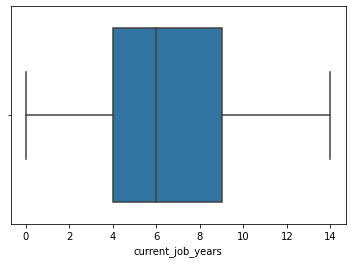

In [12]:
sns.boxplot(x=good_data['current_job_years'])

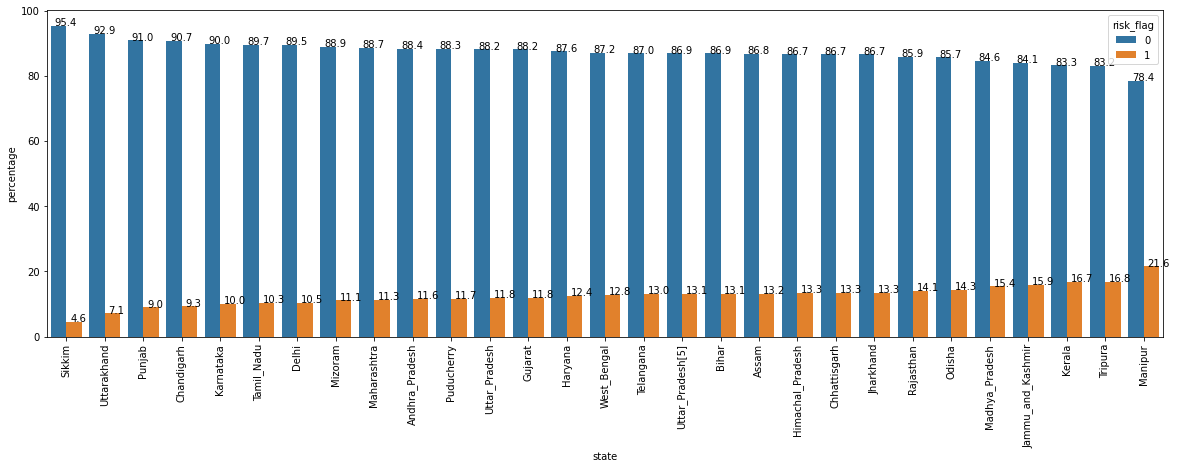

In [13]:
percentage_hue("state")

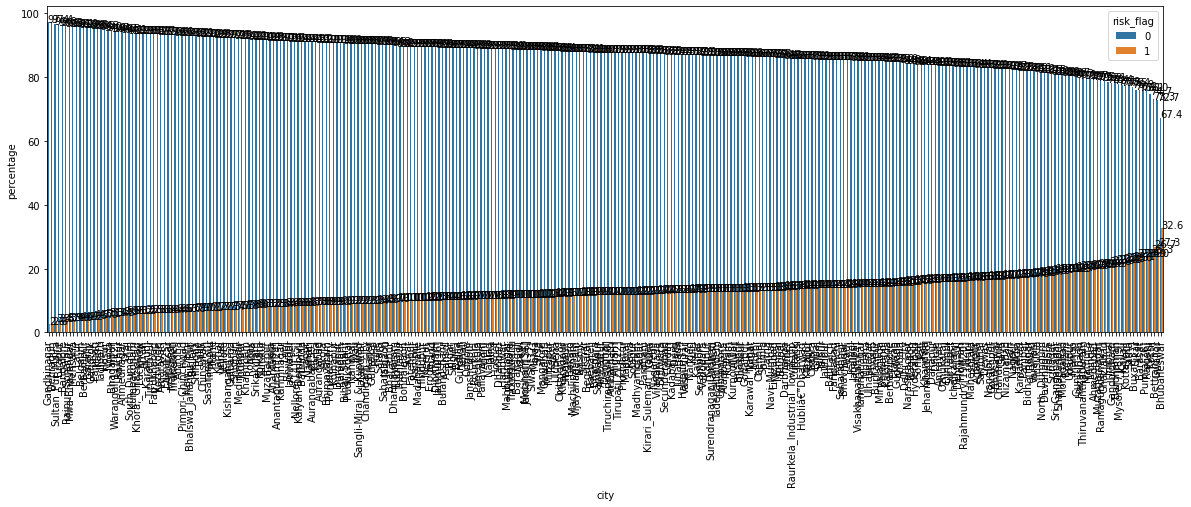

In [14]:
percentage_hue("city")

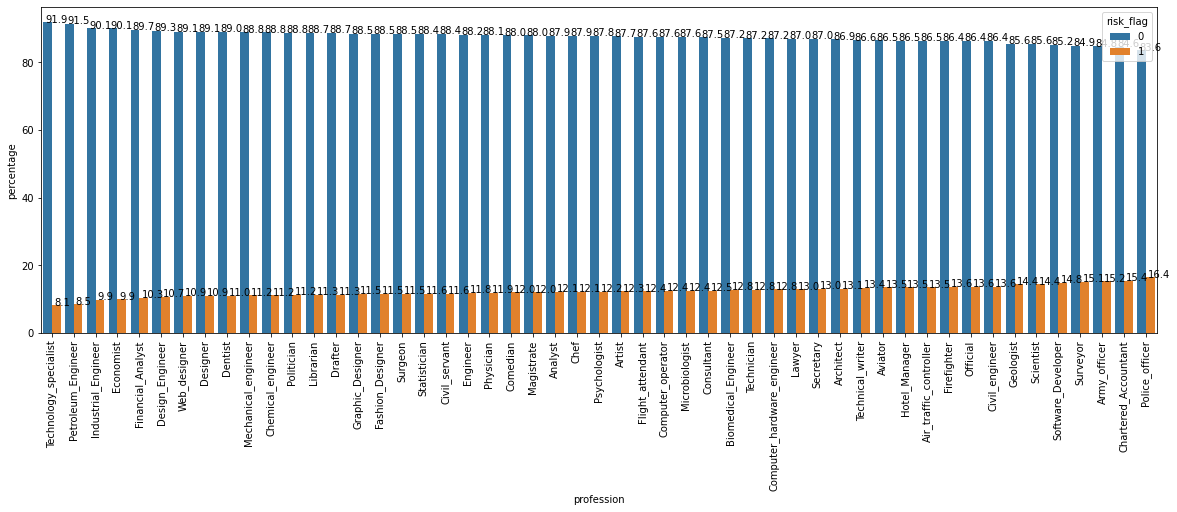

In [15]:
percentage_hue("profession")

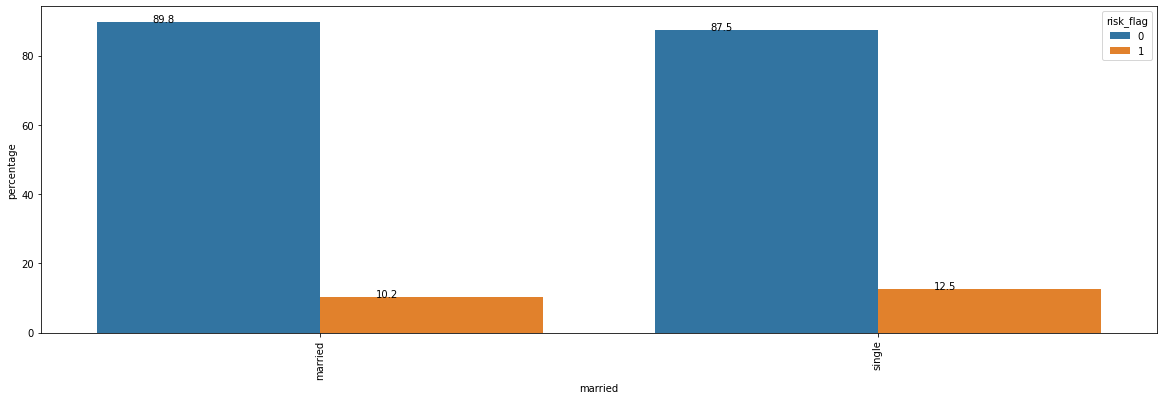

In [16]:
percentage_hue("married")

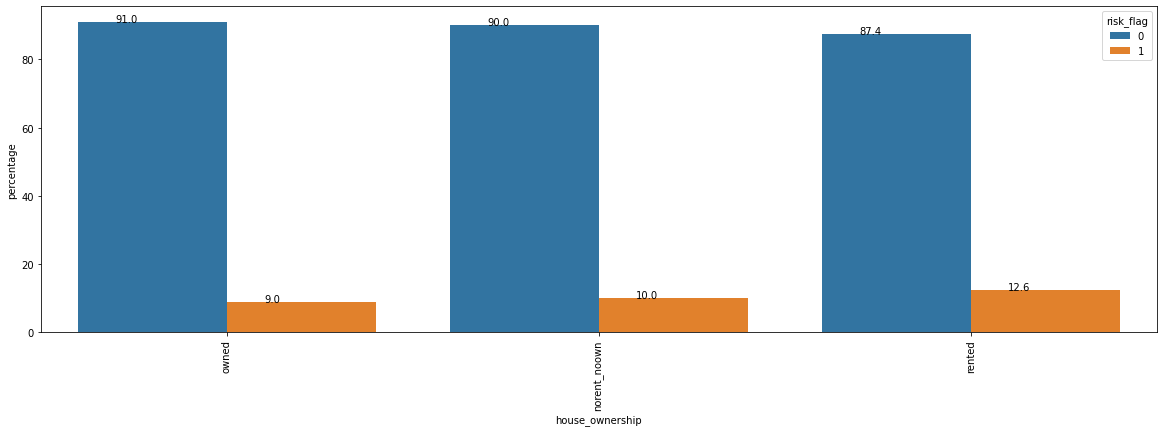

In [17]:
percentage_hue("house_ownership")

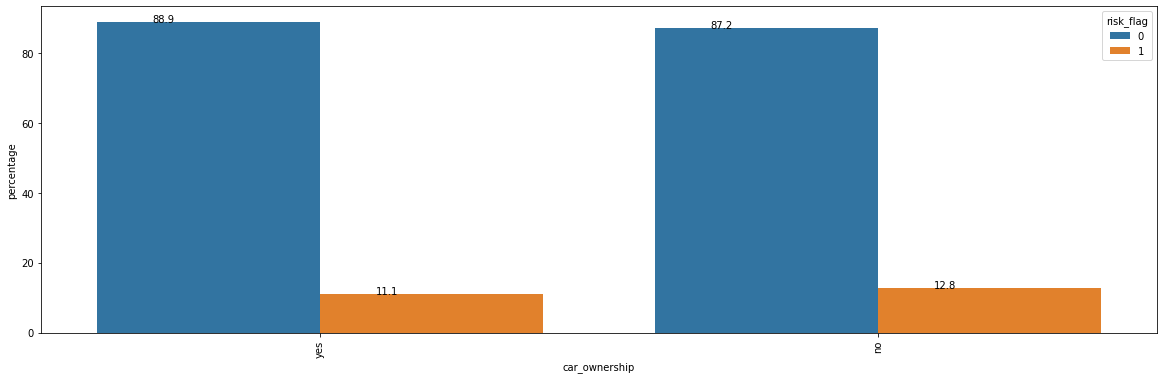

In [18]:
percentage_hue("car_ownership")

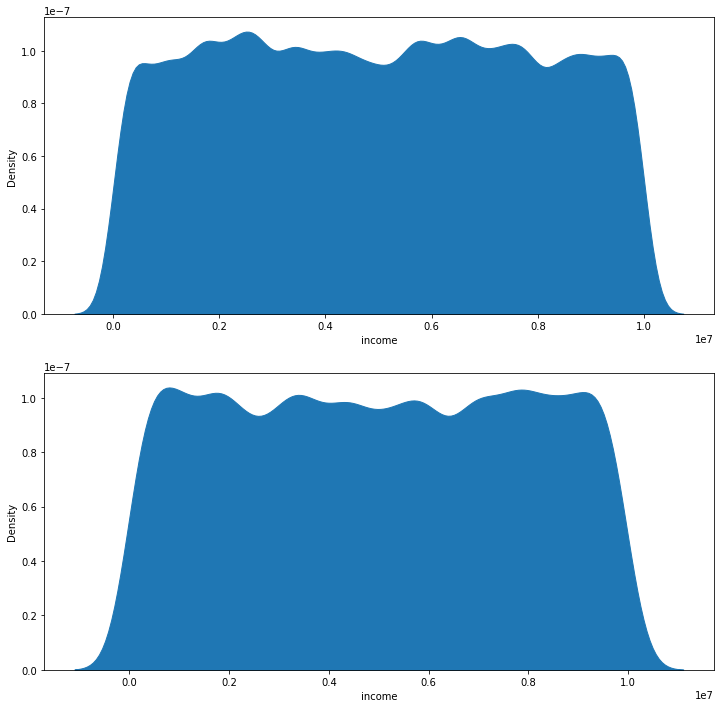

In [19]:
density_plot("income")

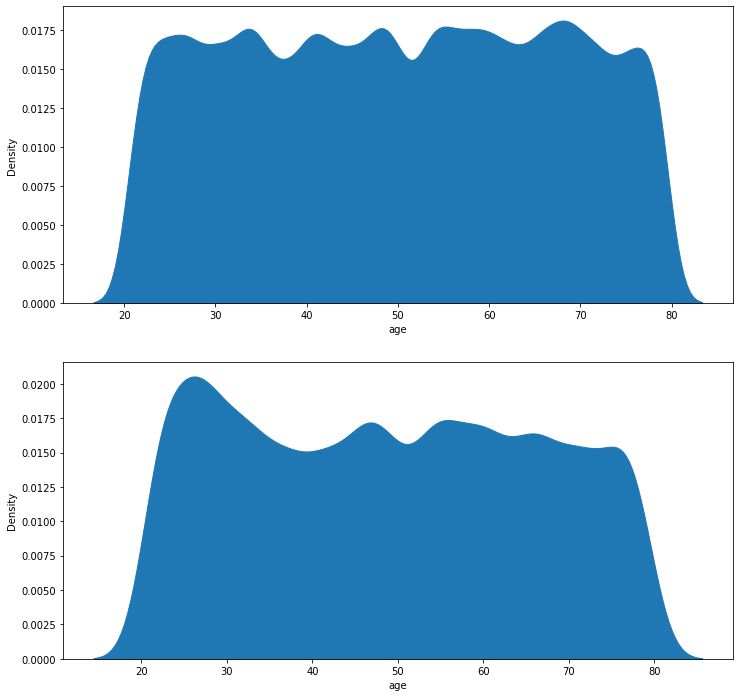

In [20]:
density_plot("age")

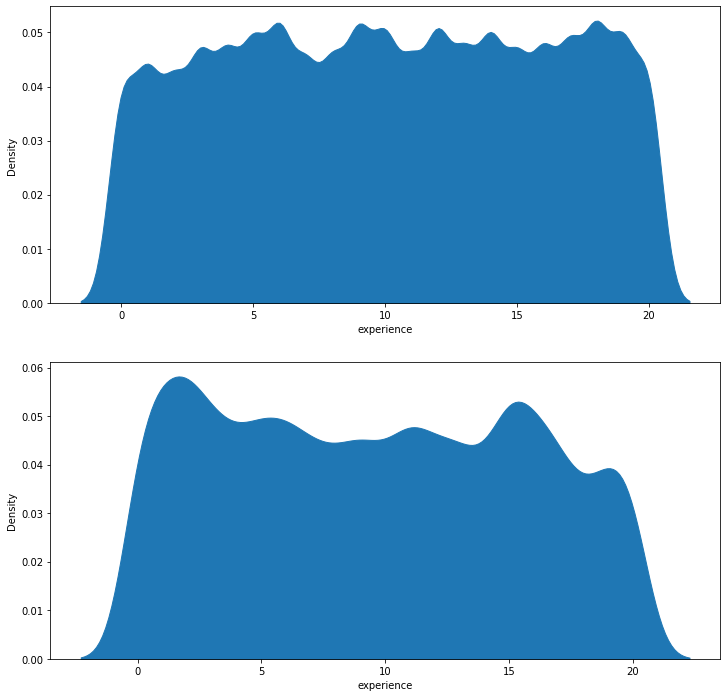

In [21]:
density_plot("experience")

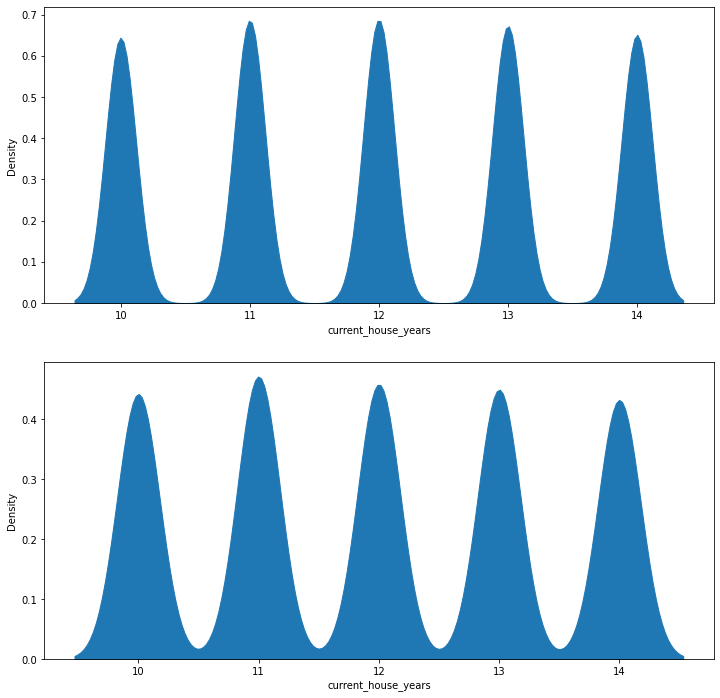

In [22]:
density_plot("current_house_years")

<AxesSubplot:>

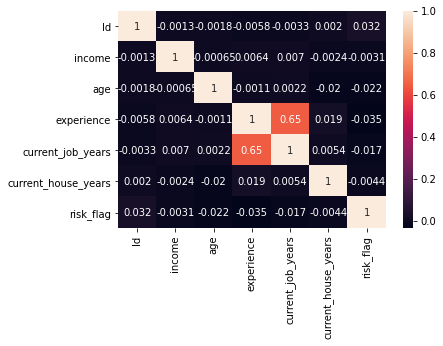

In [23]:
sns.heatmap(impt_data.corr(), annot=True)

In [24]:
impt_data["risk_flag"].value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

In [25]:
attribute_counts = (impt_data.groupby(["city"])['risk_flag']
                         .value_counts(normalize=True)
                         .rename('percentage')
                         .mul(100)
                         .reset_index()
                         .sort_values('percentage'))

order = attribute_counts[attribute_counts["risk_flag"] == 1]

# Pre Processing

In [26]:
bc_labels_pd = impt_data["risk_flag"]

In [27]:
# include_columns = ["income", "age", "experience", "married", "house_ownership", "car_ownership", "profession", "state", "current_job_years", "current_house_years"]
include_columns = ["income", "age", "experience", "married", "house_ownership", "car_ownership", "profession", "city", "state", "current_job_years", "current_house_years"]
data_pd = impt_data[include_columns]
data_test_pd = test_data[include_columns]

In [28]:
# city_series = data_pd.pop("city")
# city_test_series = data_test_pd.pop("city")

# y = pd.get_dummies(city_series)
# data_pd = pd.concat([data_pd, y], axis=1, join="inner")

# y = pd.get_dummies(city_test_series)
# data_test_pd = pd.concat([data_test_pd, y], axis=1, join="inner")

In [29]:
# Categorical boolean mask
categorical_feature_mask = data_pd.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_pd.columns[categorical_feature_mask].tolist()

In [30]:
# for col in categorical_cols:
#     le = LabelEncoder()
    
#     attribute_counts = (impt_data.groupby([col])['risk_flag']
#                          .value_counts(normalize=True)
#                          .rename('percentage')
#                          .mul(100)
#                          .reset_index()
#                          .sort_values('percentage'))
    
#     order = attribute_counts[attribute_counts["risk_flag"] == 1][col]
#     order = pd.concat([order, data_test_pd[col]], axis=0)
    
#     le.fit(order)
#     # apply le on categorical feature columns
#     data_pd[col] = le.transform(data_pd[col])
#     # data_pd = ct.fit_transform(data_pd)
#     data_pd[col].head(10)

#     data_test_pd[col] = le.transform(data_test_pd[col])
#     # data_test_pd = le.transform(data_test_pd)
#     data_test_pd[col].head(10)

In [31]:
for col in categorical_cols:
    # instantiate labelencoder object
    le = LabelEncoder()
    att = pd.concat([data_pd[col], data_test_pd[col]], axis=0)
    le.fit(att)

    # apply le on categorical feature columns
    data_pd[col] = le.transform(data_pd[col])

    data_test_pd[col] = le.transform(data_test_pd[col])

C:\Users\Sriram Pingali\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sriram Pingali\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [32]:
data = data_pd.to_numpy()
X_test = data_test_pd.to_numpy()
data = preprocessing.scale(data)
X_test = preprocessing.scale(X_test)
labels = bc_labels_pd.to_numpy()
print(data_pd.shape)
print(X_test.shape)
print(labels.shape)

(252000, 11)
(28000, 11)
(252000,)


In [33]:
data_pd

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1303835,23,3,1,2,0,50,262,17,3,13
1,7574516,40,10,1,2,0,63,236,18,9,13
2,3991815,66,4,0,2,0,68,8,15,4,10
3,6256451,41,2,1,2,1,63,55,21,2,12
4,5768871,47,11,1,2,0,18,312,27,3,14
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,65,167,36,6,11
251996,2843572,26,10,1,2,0,5,262,17,6,11
251997,4522448,46,7,1,2,0,27,146,18,7,12
251998,6507128,45,0,1,2,0,41,242,22,0,10


# Accuracy Score

In [34]:
def accuracy(Y_hat, Y):
    accuracy = accuracy_score(np.argmax(Y_hat.cpu().detach().numpy(), 1), Y)
    f1_scr = f1_score(np.argmax(Y_hat.cpu().detach().numpy(), 1), Y, average='weighted')
    roc = roc_auc_score(np.argmax(Y_hat.cpu().detach().numpy(), 1), Y)
    return(accuracy, f1_scr, roc)

In [35]:
def visualize(model, proba):    
    Y_pred =  model.predict_proba(X_Test, proba)
    print("Val: ", accuracy(Y_OH_val, model.predict_proba(X_val, proba)))
    print("Test: ", accuracy(Y_OH_Test, Y_pred))
    cm = confusion_matrix(Y_Test, Y_pred)
    print(cm)
    plt.imshow(cm, cmap='binary')

# OH Encoding

In [36]:
enc = OneHotEncoder()

enc.fit(np.expand_dims(labels, 1))

OneHotEncoder()

# Train Test Split

In [37]:
from sklearn import preprocessing

data = preprocessing.scale(data)

In [38]:
X_temp, X_Test, Y_temp, Y_Test = train_test_split(data, labels, test_size = 0.3, shuffle=True, stratify=labels)

In [39]:
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# over = SMOTE(sampling_strategy=0.5)
# under = RandomUnderSampler(sampling_strategy=0.5)

# steps = [('o', over), ('u', under)]
# # steps = [('u', under)]
# pipeline = Pipeline(steps=steps)

# X_temp, Y_temp = pipeline.fit_resample(X_temp, Y_temp)

In [40]:
# X_train, X_val, Y_OH_train, Y_OH_val = train_test_split(X_temp, Y_temp, random_state = 100, test_size = 0.3, shuffle=True, stratify=Y_temp)

from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=3, random_state=10, shuffle=True) 

In [41]:
# enc = OneHotEncoder()
# Y_OH_train = enc.fit_transform(np.expand_dims(Y_train, 1)).toarray()
# Y_OH_val = enc.transform(np.expand_dims(Y_val, 1)).toarray()
# Y_OH_Test = enc.transform(np.expand_dims(Y_Test, 1)).toarray()

In [42]:
# X_train, Y_OH_train, X_val, Y_OH_val, X_test, X_Test, Y_OH_Test = map(torch.tensor, (X_train, Y_OH_train, X_val, Y_OH_val, X_test, X_Test, Y_OH_Test))

In [43]:
# X_train, X_val, X_test, X_Test = X_train.float(), X_val.float(), X_test.float(), X_Test.float()

# Cuda Support

In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = 'cpu'

def preprocess(X_train, X_val, Y_train, Y_val, X_test, X_Test, Y_Test):
    Y_OH_train = enc.transform(np.expand_dims(Y_train, 1)).toarray()
    Y_OH_val = enc.transform(np.expand_dims(Y_val, 1)).toarray()
    Y_OH_Test = enc.transform(np.expand_dims(Y_Test, 1)).toarray()
    X_train, Y_OH_train, X_val, Y_OH_val, X_test, X_Test, Y_OH_Test = map(torch.tensor, (X_train, Y_OH_train, X_val, Y_OH_val, X_test, X_Test, Y_OH_Test))
    X_train, X_val, X_test, X_Test = X_train.float(), X_val.float(), X_test.float(), X_Test.float()
    X_train = X_train.to(device)
    X_val = X_val.to(device)
    X_test  = X_test.to(device)
    X_Test = X_Test.to(device)
    Y_OH_train = Y_OH_train.to(device)
    Y_OH_val = Y_OH_val.to(device)
    Y_OH_Test = Y_OH_Test.to(device)
    return(X_train, X_val, Y_OH_train, Y_OH_val, X_test, X_Test, Y_OH_Test)

# FF Network

In [45]:
# class FF_Network(nn.Module):
#     def __init__(self):
#         super().__init__()
#         torch.manual_seed(0)
#         self.net = nn.Sequential(
#             nn.Linear(X_temp.shape[1], 100),
#             nn.ReLU(),
            
#             nn.Linear(100, 128),
#             nn.ReLU(),
            
#             nn.Linear(128,100),
#             nn.ReLU(),
            
#             nn.Linear(100, 64),
#             nn.LeakyReLU(),
            
#              nn.Linear(64, 80),
#             nn.LeakyReLU(),
            
#             nn.Linear(80, 16),
#             nn.LeakyReLU(),
            
#             nn.Linear(16,8),
#             nn.LeakyReLU(),
            
#             nn.Linear(8, 2),
#         )
           
#     def forward(self, X):
#         return(self.net(X))

In [46]:
class FF_Network(nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.net = nn.Sequential(
            nn.Linear(X_temp.shape[1], 100),
            nn.ReLU(),
            
            nn.Linear(100, 128),
            nn.ReLU(),
            
            nn.Linear(128,64),
            nn.Tanh(),
            
            nn.Linear(64, 2),
#             nn.Sigmoid()
#             nn.LeakyReLU(),
            
#             nn.Linear(50, 16),
#             nn.LeakyReLU(),
            
#             nn.Linear(16, 2),
        )
    
    def predict_proba(self, X, proba):
        predtst = F.softmax(self.net(X), dim=1).to('cpu').detach().numpy()
        pred = np.where(predtst[:,1] >= proba, 1, 0 )
        return(pred)
    
    def predict(self, X):
        predtst = F.softmax(self.net(X), dim=1).to('cpu').detach().numpy()
        pred = np.argmax(predtst, 1)
        return(pred)
           
    def forward(self, X):
        return(self.net(X))

In [47]:
ff_n = FF_Network()
ff_n = ff_n.to(device)
loss_fn = nn.CrossEntropyLoss()

In [48]:
def train(X, Y, model, loss_fn = loss_fn, lr = 0.02, epochs = 2500, batch_size = 512):
    loss_b = []
    acc_b = []
    acc = 0
    optm = optim.Adam(ff_n.parameters(), lr = lr)
    Y_temp_ = Y.to('cpu')
    Y = np.argmax(Y_temp_, 1)
    Y = Y.to(device)
    for i in tqdm(range(epochs)):
        for i in range(X.shape[0] // batch_size):
            local_X, local_Y, local_y_temp = X[i*batch_size:(i+1)*batch_size,], Y[i*batch_size:(i+1)*batch_size,], Y_temp_[i*batch_size:(i+1)*batch_size,]
            Y_pred = model.forward(local_X)
            loss = loss_fn(Y_pred, local_Y)
            Y_pred_proba = model.predict_proba(local_X, 0.5)
            acc, _, _ = accuracy(local_y_temp, Y_pred_proba)
            loss_b.append(loss.item())
            acc_b.append(acc)
            loss.backward()
            optm.step()
            optm.zero_grad()
    return(loss_b, acc_b, acc)

In [49]:
# %%time
# for train_index, val_index in skf.split(X_temp, Y_temp):
#     X_train, X_val = X_temp[train_index], X_temp[val_index] 
#     Y_train, Y_val = Y_temp[train_index], Y_temp[val_index]
#     X_train, X_val, Y_OH_train, Y_OH_val, X_test, X_Test, Y_OH_Test = preprocess(X_train, X_val, Y_train, Y_val, X_test, X_Test, Y_Test)
#     print(np.count_nonzero(Y_train==0), np.count_nonzero(Y_train==1))
#     loss_b, acc_b, acc_score = train(X_train, Y_OH_train, ff_n, loss_fn, lr = 0.0001, epochs = 100, batch_size = 10000)

# for i in range(1):
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size = 0.3, shuffle=True, stratify=Y_temp)
X_train, X_val, Y_OH_train, Y_OH_val, X_test, X_Test, Y_OH_Test = preprocess(X_train, X_val, Y_train, Y_val, X_test, X_Test, Y_Test)
loss_b, acc_b, acc_score = train(X_train, Y_OH_train, ff_n, loss_fn, lr = 0.01, epochs = 500, batch_size = 60000)

100%|██████████| 500/500 [07:08<00:00,  1.15it/s]


Text(0, 0.5, 'acc')

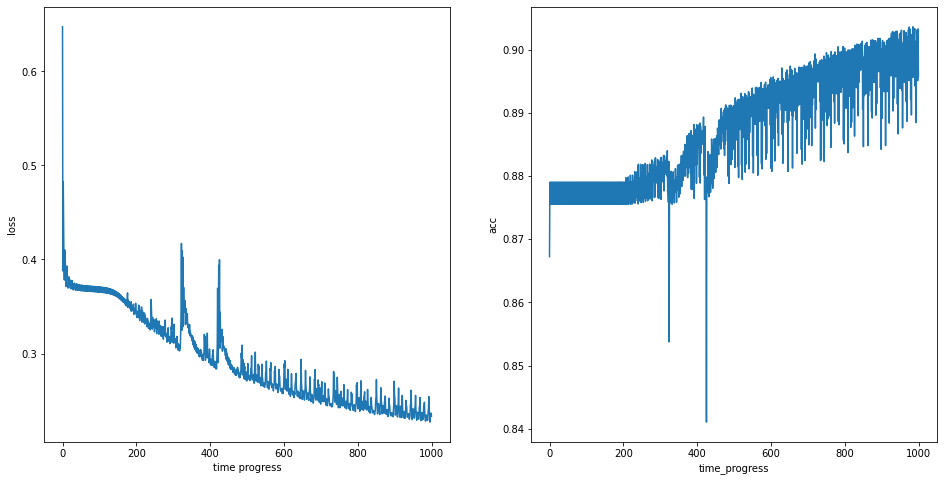

In [50]:
fig = plt.figure(figsize = (16, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(loss_b)
ax1.set_xlabel('time progress')
ax1.set_ylabel('loss')
ax2.plot(acc_b)
ax2.set_xlabel('time_progress')
ax2.set_ylabel('acc')

Val:  (0.7813492063492063, 0.8151441704551303, 0.810355339781612)
Test:  (0.7813492063492063, 0.8150364043262951, 0.8077098903184581)
[[51234 15067]
 [ 1463  7836]]


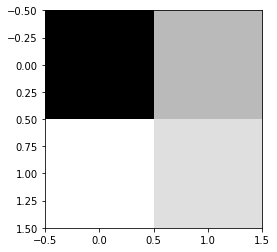

In [51]:
visualize(ff_n, 0.1)

In [52]:
print(classification_report(np.argmax(Y_OH_Test.to('cpu').detach().numpy(), 1), np.argmax(ff_n(X_Test).to('cpu').detach().numpy(), 1)))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     66301
           1       0.54      0.41      0.47      9299

    accuracy                           0.89     75600
   macro avg       0.73      0.68      0.70     75600
weighted avg       0.87      0.89      0.88     75600



# Visual Evaluation

[[44174  2237]
 [ 3754  2755]]


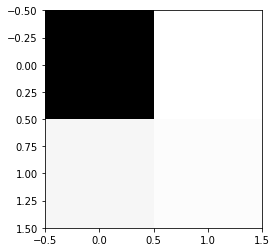

In [53]:
cm = confusion_matrix(np.argmax(Y_OH_val.to('cpu').detach().numpy(), 1), np.argmax(ff_n(X_val).to('cpu').detach().numpy(), 1))
print(cm)
plt.imshow(cm, cmap='binary')

[[104036   4256]
 [  7817   7371]]


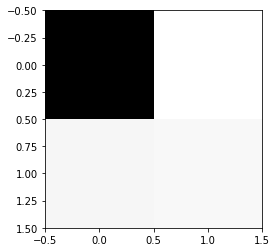

In [54]:
cm = confusion_matrix(np.argmax(Y_OH_train.to('cpu').detach().numpy(), 1), np.argmax(ff_n(X_train).to('cpu').detach().numpy(), 1))
print(cm)
plt.imshow(cm, cmap='binary')

# Saving Model

In [55]:
import csv
Y_test_pred = ff_n.forward(X_test)

with open('submission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'risk_flag'])
    for i, row in enumerate(Y_test_pred):
        writer.writerow([i+1, enc.inverse_transform(Y_test_pred.to('cpu').detach().numpy())[i, 0]])

In [56]:
file.close()